In [1]:
import pandas as pd

df_train = pd.read_csv('../data/train_data_stg.csv', delimiter='|')
df_test = pd.read_csv('../data/test_data_stg.csv', delimiter='|')

In [5]:
import numpy as np
df_train['t'] = np.log(df_train['t'])
df_train['p'] = np.log(df_train['p'])

df_test['t'] = np.log(df_test['t'])
df_test['p'] = np.log(df_test['p'])

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=4, 
    learning_rate=0.01, 
    n_estimators=10000,
    random_state=42,
    n_iter_no_change=50
    )
gbrt.fit(df_train[['t']], df_train['p'])

prediction = gbrt.predict(df_test[['t']])

In [19]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, root_mean_squared_log_error

print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(df_test[['p']], prediction))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(df_test[['p']], prediction))
print("R2 Score %.2f" % r2_score(df_test[['p']], prediction))

Mean Absolute Error (MAE): 1.18
Root Mean Squarred Error (RMSE): 1.53
R2 Score 0.42


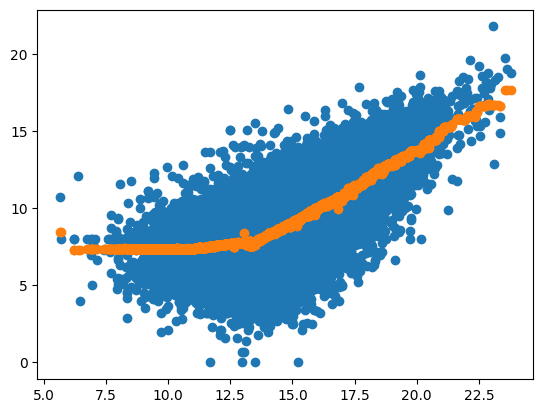

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df_test['t'], df_test['p'])
plt.scatter(df_test['t'], prediction)
plt.show()